## 02. 분류

In [16]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 2-1. 로지스틱 회귀
#### 이진 분류

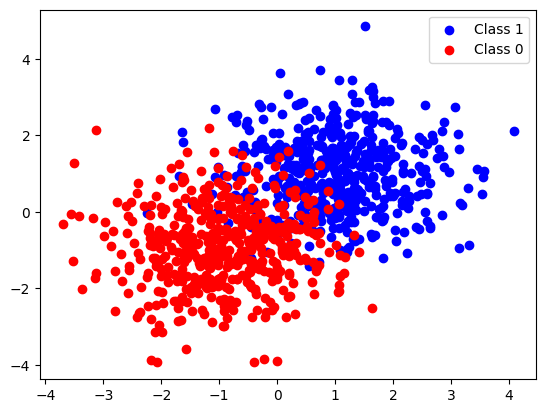

Epoch [100 / 1000], Loss:  0.3400
Epoch [200 / 1000], Loss:  0.2976
Epoch [300 / 1000], Loss:  0.2726
Epoch [400 / 1000], Loss:  0.2562
Epoch [500 / 1000], Loss:  0.2446
Epoch [600 / 1000], Loss:  0.2361
Epoch [700 / 1000], Loss:  0.2295
Epoch [800 / 1000], Loss:  0.2243
Epoch [900 / 1000], Loss:  0.2200
Epoch [1000 / 1000], Loss:  0.2166


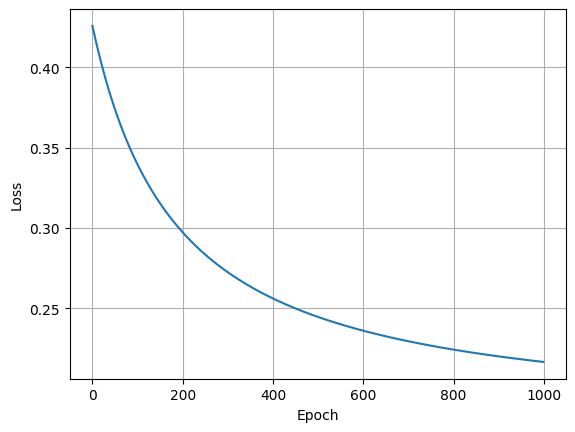

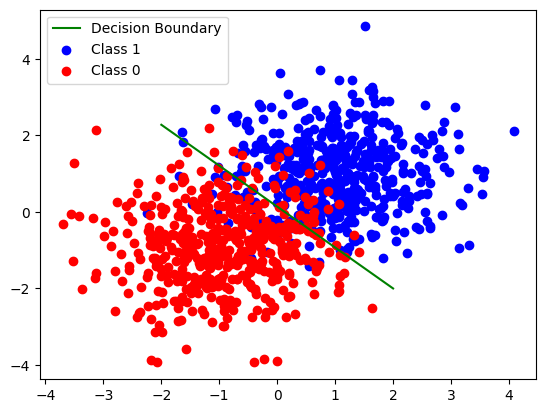

In [15]:
# 1. 데이터 입출력 정의
np.random.seed(42) # 시드 고정
num_samples = 1000

mean_1 = np.array([1., 1.])
cov_1 = np.array([[1,0], [0,1]])
data_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples // 2)

mean_2 = np.array([-1., -1.])
cov_2 = np.array([[1,0], [0,1]])
data_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples // 2)

# 데이터 확인
plt.scatter(data_1[:, 0], data_1[:, 1], color="b", label="Class 1")
plt.scatter(data_2[:, 0], data_2[:, 1], color="r", label="Class 0")
plt.legend()
plt.show()

# 데이터 정의 및 텐서로 변환
data = np.vstack((data_1, data_2))
labels = np.ones(num_samples)
labels[num_samples//2:] = 0

data = torch.from_numpy(data).float()
labels = torch.from_numpy(labels).float()
labels = labels.view(-1, 1)
num_samples, num_features = data.shape

# 2. 모델 정의
class LogisticRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.linear = nn.Linear(input_dim, output_dim)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.linear(x)
    out = self.sigmoid(out)
    return out
  
model = LogisticRegression(2, 1)

# 3. 손실함수 정의
criterion = nn.BCELoss()

# 4. 가중치 업데이트(학습)
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
epochs = 1000
losses = []

for epoch in range(epochs):
  inputs = Variable(data)
  targets = Variable(labels)

  optimizer.zero_grad()
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1} / {epochs}], Loss: {loss.item(): .4f}")

# 5. 시각화
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# 결정 경계 그리기
w = model.linear.weight.data.numpy()
b = model.linear.bias.data.numpy()
x_plot = np.array([-2,2])
y_plot = (-b -w[0][0] * x_plot) / w[0][1]
plt.plot(x_plot, y_plot, color="g", label="Decision Boundary")
plt.scatter(data_1[:, 0], data_1[:, 1], color="b", label="Class 1")
plt.scatter(data_2[:, 0], data_2[:, 1], color="r", label="Class 0")
plt.legend()
plt.show()

### 2-2. FashionMNIST 신경망(다항분류)

In [ ]:
# 1. 데이터 입출력 정의
transform = transforms.ToTensor()   # 이미지 데이터를 tensor로 변환

# 트레이닝 데이터 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True, 
    download=True,
    transform=transform
)

# 테스트 데이터 정의
test_data = datasets.FashionMNIST(
    root="data",
    train=False, 
    download=True,
    transform=transform
)

# 데이터 로더 정의
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# 2. 모델 정의
class MulticClassificationModel(nn.Module):
    def __init(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU,
            nn.Linear(512, 256), 
            nn.ReLU,
            nn.Linear(256, 64),
            nn.ReLU,
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        out = self.model(x)
        return out